In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


# Federico Ariton
### Master in Data Analytics
### CA 2 Integrated
### Student Number:sba22090

In [7]:
import praw
import pandas as pd
import time

# Reddit API credentials
client_id = "-----------------------" # Use your own API key or analyze the CSV file generated below
client_secret = "-----------------------"
user_agent = "AgricultureSentimentAnalysis/0.1"

# Authenticate with Reddit
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

# Define subreddit(s) and queries
subreddits = ["farming", "agriculture", "agribusiness", "irishfarming"]
queries = ["Barley", "Wheat", "Milk", "Hen eggs", "Meat", "Raw milk of cattle"]

# Fetch posts from multiple subreddits and queries
posts = []
for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    print(f"Fetching posts from subreddit: {subreddit_name}")
    for query in queries:
        try:
            print(f"Query: {query}")
            for post in subreddit.search(query, limit=100, time_filter="all", sort="relevance"):
                posts.append({
                    "subreddit": subreddit_name,
                    "query": query,
                    "title": post.title,
                    "selftext": post.selftext,
                    "score": post.score,
                    "created_utc": post.created_utc,
                    "url": post.url
                })
                time.sleep(1)  # Avoid hitting API limits
        except Exception as e:
            print(f"An error occurred with query '{query}' in subreddit '{subreddit_name}': {e}")

# Convert posts to a DataFrame
df = pd.DataFrame(posts)

# Save to CSV
df.to_csv("Analysis/reddit_agriculture_sentiment1.csv", index=False)
print("Data saved to reddit_agriculture_sentiment1.csv")


Fetching posts from subreddit: farming
Query: Barley
Query: Wheat
Query: Milk
Query: Hen eggs
Query: Meat
Query: Raw milk of cattle
Fetching posts from subreddit: agriculture
Query: Barley
Query: Wheat
Query: Milk
Query: Hen eggs
Query: Meat
Query: Raw milk of cattle
Fetching posts from subreddit: agribusiness
Query: Barley
Query: Wheat
Query: Milk
Query: Hen eggs
Query: Meat
Query: Raw milk of cattle
Fetching posts from subreddit: irishfarming
Query: Barley
An error occurred with query 'Barley' in subreddit 'irishfarming': Redirect to /subreddits/search
Query: Wheat
An error occurred with query 'Wheat' in subreddit 'irishfarming': Redirect to /subreddits/search
Query: Milk
An error occurred with query 'Milk' in subreddit 'irishfarming': Redirect to /subreddits/search
Query: Hen eggs
An error occurred with query 'Hen eggs' in subreddit 'irishfarming': Redirect to /subreddits/search
Query: Meat
An error occurred with query 'Meat' in subreddit 'irishfarming': Redirect to /subreddits/sear

In [15]:
# Load the new CSV file uploaded by the user
file_path_new = 'Analysis/reddit_agriculture_sentiment1.csv'
reddit_data = pd.read_csv(file_path_new)

# Display the first few rows of the newly uploaded dataset to understand its structure
reddit_data.head()


,subreddit,query,title,selftext,score,created_utc,url
0,farming,Barley,Started seeding this week in Southern Alberta....,NaN,403,1.649534e+09,https://i.imgur.com/8QwgCv1.jpg
1,farming,Barley,"Pulled up for the weekend, ready to start barl...",NaN,93,1.714798e+09,https://i.redd.it/i0nt4ipsbcyc1.jpeg
2,farming,Barley,Can you make silage or pellets from hydroponic...,\nI'm new to farming & currently growing barle...,0,1.726652e+09,https://www.reddit.com/r/farming/comments/1fjo...
3,farming,Barley,1st day of barley over 💪,Them straw swaths are so satisfying 😍,41,1.721547e+09,https://www.reddit.com/gallery/1e8gr6t
4,farming,Barley,How do you harvest cerial crops (Barley) on sm...,I am wanting to grow about 1 acre of 2-row bar...,19,1.679104e+09,https://www.reddit.com/r/farming/comments/11ub...


In [17]:
# Installing TextBlob in the environment
!pip install textblob

In [20]:
from textblob import TextBlob

# Apply sentiment analysis using TextBlob on the 'content' column
reddit_data['content'] = reddit_data['title'] + " " + reddit_data['selftext'].fillna("")

# Get sentiment polarity for each post
reddit_data['sentiment_score'] = reddit_data['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment into positive, negative, and neutral
reddit_data['sentiment_category'] = reddit_data['sentiment_score'].apply(
    lambda score: 'positive' if score > 0.1 else ('negative' if score < -0.1 else 'neutral')
)

# Summarize sentiment categories
sentiment_summary = reddit_data['sentiment_category'].value_counts()

sentiment_summary, output_path


(sentiment_category
 neutral     431
 positive    246
 negative     72
 Name: count, dtype: int64,
 '/mnt/data/reddit_agriculture_sentiment_with_textblob.csv')

In [22]:
sentiment_by_query = reddit_data.groupby(['query', 'sentiment_category']).size().unstack(fill_value=0)
sentiment_by_query


sentiment_category,negative,neutral,positive
query,,,
Barley,5,95,46
Hen eggs,5,12,12
Meat,23,104,73
Milk,26,94,51
Raw milk of cattle,0,1,2
Wheat,13,125,62


In [26]:
# Top positive posts
top_positive_posts = reddit_data[reddit_data['sentiment_category'] == 'positive'].sort_values(by='sentiment_score', ascending=False).head()

# Top negative posts
top_negative_posts = reddit_data[reddit_data['sentiment_category'] == 'negative'].sort_values(by='sentiment_score').head()

top_positive_posts, top_negative_posts


(       subreddit  query                                              title  \
 489  agriculture  Wheat   Allhamdulillah My Wheat 🌾 crop ..... excellent 💯   
 103      farming  Wheat  Seeding $4 wheat is a perfect job for the 15k ...   
 544  agriculture  Wheat  Question for r/Agriculture:  What has the high...   
 193      farming  Wheat  The winter wheat is coming up beautifully this...   
 593  agriculture   Milk  Happy National Milk Day! Be sure to thank a da...   
 
                                               selftext  score   created_utc  \
 489                                                NaN     28  1.711348e+09   
 103                                                NaN    161  1.725468e+09   
 544  I just read in *An Edible History to Humanity*...      5  1.290813e+09   
 193                                                NaN    266  1.605094e+09   
 593                                                NaN      8  1.515701e+09   
 
                                          

C:\Users\feder\AppData\Local\Temp\ipykernel_62772\1113034056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reddit_data, x='sentiment_category', palette='viridis', order=['positive', 'neutral', 'negative'])


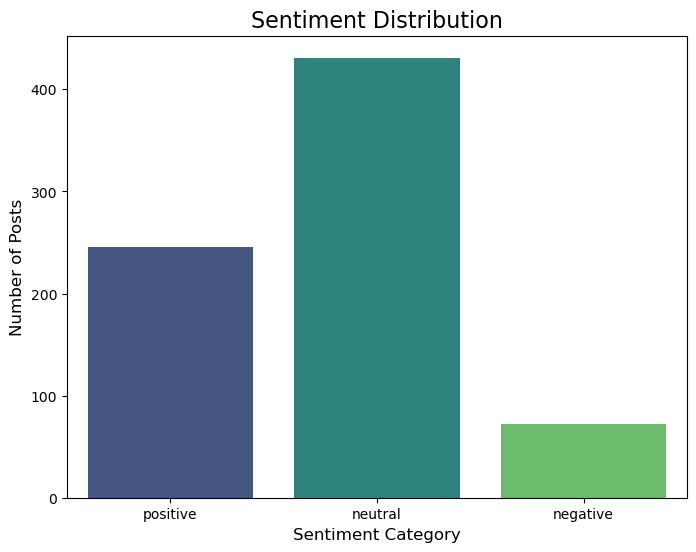

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution using seaborn with viridis color palette
plt.figure(figsize=(8, 6))
sns.countplot(data=reddit_data, x='sentiment_category', palette='viridis', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



In [36]:
# Extract the top negative posts based on sentiment score
top_negative_posts = reddit_data[reddit_data['sentiment_category'] == 'negative'].sort_values(by='sentiment_score').head()

top_negative_posts[['title', 'content', 'sentiment_score', 'subreddit', 'query']]


,title,content,sentiment_score,subreddit,query
116,US wheat farmers face bleak crop economics as ...,US wheat farmers face bleak crop economics as ...,-1.000000,farming,Wheat
639,Brutal map shows why U.S. farmers want Trump t...,Brutal map shows why U.S. farmers want Trump t...,-0.875000,agriculture,Milk
397,Why the CEO of Impossible Foods thinks he can ...,Why the CEO of Impossible Foods thinks he can ...,-0.666667,farming,Meat
680,FDA admits chicken meat contains arsenic,FDA admits chicken meat contains arsenic,-0.600000,agriculture,Meat
8,Is it wheat or barley?,Is it wheat or barley? Sorry I'm not a farmer,-0.500000,farming,Barley


In [38]:
# Analyze negative sentiment by query
negative_sentiment_by_query = (
    reddit_data[reddit_data['sentiment_category'] == 'negative']
    .groupby('query')
    .size()
    .sort_values(ascending=False)
)

negative_sentiment_by_query


query
Milk        26
Meat        23
Wheat       13
Barley       5
Hen eggs     5
dtype: int64

In [40]:
# Analyze negative sentiment by query and subreddit
negative_sentiment_by_query_subreddit = (
    reddit_data[reddit_data['sentiment_category'] == 'negative']
    .groupby(['query', 'subreddit'])
    .size()
    .unstack(fill_value=0)
)

negative_sentiment_by_query_subreddit


subreddit,agriculture,farming
query,,
Barley,0,5
Hen eggs,0,5
Meat,9,14
Milk,7,19
Wheat,4,9


In [42]:
# Extract content for the top negative queries ("Milk" and "Meat") across subreddits
negative_content_milk = reddit_data[
    (reddit_data['query'] == 'Milk') & (reddit_data['sentiment_category'] == 'negative')
][['title', 'content', 'subreddit', 'sentiment_score']]

negative_content_meat = reddit_data[
    (reddit_data['query'] == 'Meat') & (reddit_data['sentiment_category'] == 'negative')
][['title', 'content', 'subreddit', 'sentiment_score']]

negative_content_milk, negative_content_meat


(                                                 title  \
 200  Bird flu detected in second lot of raw milk so...   
 202  Organic dairy farmers consider dumping milk du...   
 205             How do cows feel about getting milked?   
 207  Debunked: Baseless claims about a cow feed sup...   
 208                           Milk house drain plugged   
 210                          Raw milk has made me sick   
 211  If you got a cow really drunk and than milked ...   
 224                                           Raw milk   
 253  It gets worse its a bull that got in with the ...   
 256  Study: Organic, Conventional Dairy Cows Show N...   
 262  Dumped milk, smashed eggs and plowed vegetable...   
 263       Small ones taking a break after milking time   
 269  Whoever said, "There's no use crying over spil...   
 274                                 Chugging down milk   
 278                                        Raw milk NJ   
 281  Political push for raw, unpasteurized milk is ... 

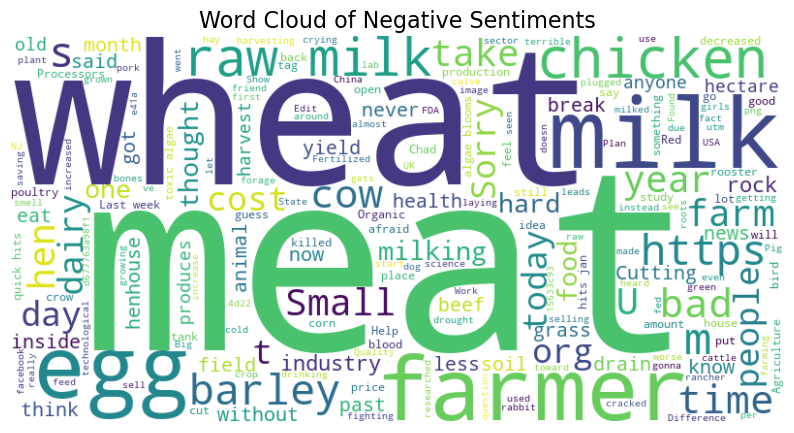

In [46]:
from wordcloud import WordCloud
# Filter content of negative posts
negative_content = " ".join(reddit_data[reddit_data['sentiment_category'] == 'negative']['content'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(negative_content)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiments', fontsize=16)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\feder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\feder\AppData\Local\Temp\ipykernel_62772\828084550.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


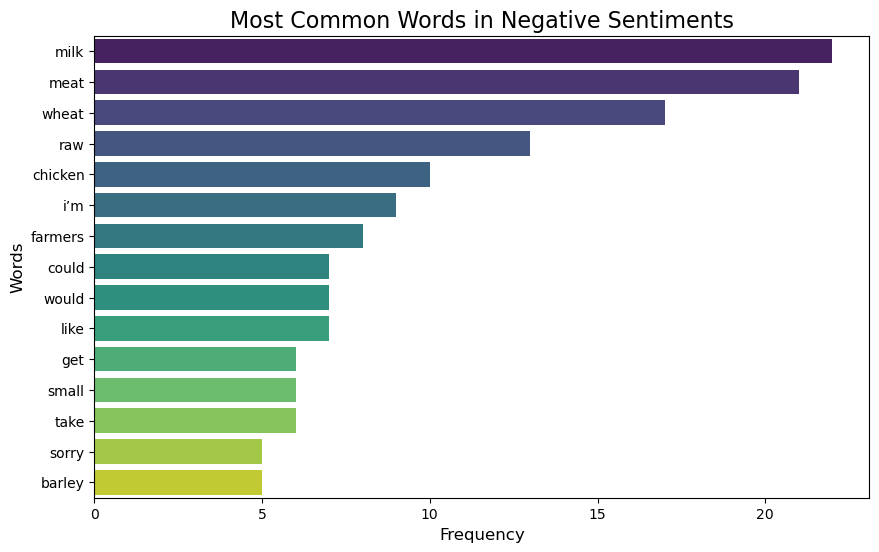

In [48]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')

# Tokenize and filter out stopwords
negative_words = [
    word.lower() for post in reddit_data[reddit_data['sentiment_category'] == 'negative']['content'].dropna()
    for word in post.split()
    if word.lower() not in stopwords.words('english')
]

# Count most common words
word_counts = Counter(negative_words).most_common(15)

# Plot the most common words
words, counts = zip(*word_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Most Common Words in Negative Sentiments', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.show()


In [52]:
# Filter negative posts for Milk and Meat
negative_milk = reddit_data[(reddit_data['query'] == 'Milk') & (reddit_data['sentiment_category'] == 'negative')]
negative_meat = reddit_data[(reddit_data['query'] == 'Meat') & (reddit_data['sentiment_category'] == 'negative')]

# Combine all text for Milk and Meat
negative_milk_text = " ".join(negative_milk['content'].dropna())
negative_meat_text = " ".join(negative_meat['content'].dropna())

# Print top posts for qualitative context
negative_milk[['title', 'content']].head(), negative_meat[['title', 'content']].head()


(                                                 title  \
 200  Bird flu detected in second lot of raw milk so...   
 202  Organic dairy farmers consider dumping milk du...   
 205             How do cows feel about getting milked?   
 207  Debunked: Baseless claims about a cow feed sup...   
 208                           Milk house drain plugged   
 
                                                content  
 200  Bird flu detected in second lot of raw milk so...  
 202  Organic dairy farmers consider dumping milk du...  
 205  How do cows feel about getting milked? Do they...  
 207  Debunked: Baseless claims about a cow feed sup...  
 208  Milk house drain plugged I’m a plumber.  I wen...  ,
                                                  title  \
 340  Why isn't rabbit meat so common like chicken o...   
 341  The Plan to Put Pig Genes in Soy Beans for Tas...   
 343                       How Are Meat Animals Killed?   
 354  Colorado rancher is tired of paying a corrupt ...   


In [54]:
# Tokenize and count word frequency for Milk
milk_words = [
    word.lower() for word in negative_milk_text.split()
    if word.lower() not in stopwords.words('english')
]
milk_word_counts = Counter(milk_words).most_common(15)

# Tokenize and count word frequency for Meat
meat_words = [
    word.lower() for word in negative_meat_text.split()
    if word.lower() not in stopwords.words('english')
]
meat_word_counts = Counter(meat_words).most_common(15)

milk_word_counts, meat_word_counts


([('milk', 22),
  ('raw', 12),
  ('cow', 4),
  ('milk.', 4),
  ('milking', 4),
  ('dairy', 3),
  ('cows', 3),
  ('it?', 3),
  ('i’m', 3),
  ('last', 3),
  ('got', 3),
  ('lot', 2),
  ('say', 2),
  ('farmers', 2),
  ('feel', 2)],
 [('meat', 21),
  ('chicken', 7),
  ('like', 4),
  ('small', 4),
  ('i’m', 4),
  ('people', 4),
  ('take', 4),
  ('•', 4),
  ('animals', 3),
  ('get', 3),
  ('beef', 3),
  ('thoughts', 3),
  ('poultry', 3),
  ('farmers', 3),
  ('think', 2)])

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize text data for topic modeling
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
milk_vectors = vectorizer.fit_transform(negative_milk['content'].dropna())
meat_vectors = vectorizer.fit_transform(negative_meat['content'].dropna())

# Perform LDA
lda_milk = LatentDirichletAllocation(n_components=3, random_state=42)
lda_meat = LatentDirichletAllocation(n_components=3, random_state=42)
milk_topics = lda_milk.fit_transform(milk_vectors)
meat_topics = lda_meat.fit_transform(meat_vectors)

# Get topic words
milk_topic_words = [
    [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    for topic in lda_milk.components_
]
meat_topic_words = [
    [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    for topic in lda_meat.components_
]

milk_topic_words, meat_topic_words


([['bothering',
   'cutting',
   'begin',
   'oversight',
   'beans',
   'calves',
   'make',
   'big',
   'explains',
   'enforcing'],
  ['_insider',
   'biggest',
   'algae',
   'hear',
   'culprits',
   'epa',
   'help',
   'fatty',
   'based',
   'enforcing'],
  ['colorado',
   'common',
   'day',
   'manure',
   'cattle',
   'impossible',
   'eat',
   'potentially',
   'help',
   'enforcing']],
 [['agriculture',
   'chicken',
   'isn',
   'poultry',
   'bad',
   'technological',
   'fed',
   'farmers',
   'meat',
   'grass'],
  ['blooms',
   'quick',
   'hits',
   '24',
   'jan',
   'like',
   'small',
   'https',
   'industry',
   'meat'],
  ['just',
   'past',
   'tags',
   'infected',
   'ear',
   'beef',
   'animals',
   'killed',
   'chicken',
   'meat']])

In [58]:
# Highly negative posts for Milk and Meat
highly_negative_milk = negative_milk[negative_milk['sentiment_score'] < -0.5]
highly_negative_meat = negative_meat[negative_meat['sentiment_score'] < -0.5]

highly_negative_milk[['title', 'content']], highly_negative_meat[['title', 'content']]


(                                                 title  \
 639  Brutal map shows why U.S. farmers want Trump t...   
 
                                                content  
 639  Brutal map shows why U.S. farmers want Trump t...  ,
                                                  title  \
 397  Why the CEO of Impossible Foods thinks he can ...   
 680           FDA admits chicken meat contains arsenic   
 
                                                content  
 397  Why the CEO of Impossible Foods thinks he can ...  
 680          FDA admits chicken meat contains arsenic   )

C:\Users\feder\AppData\Local\Temp\ipykernel_62772\2293789855.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=milk_word_df, x='Frequency', y='Word', palette='viridis')


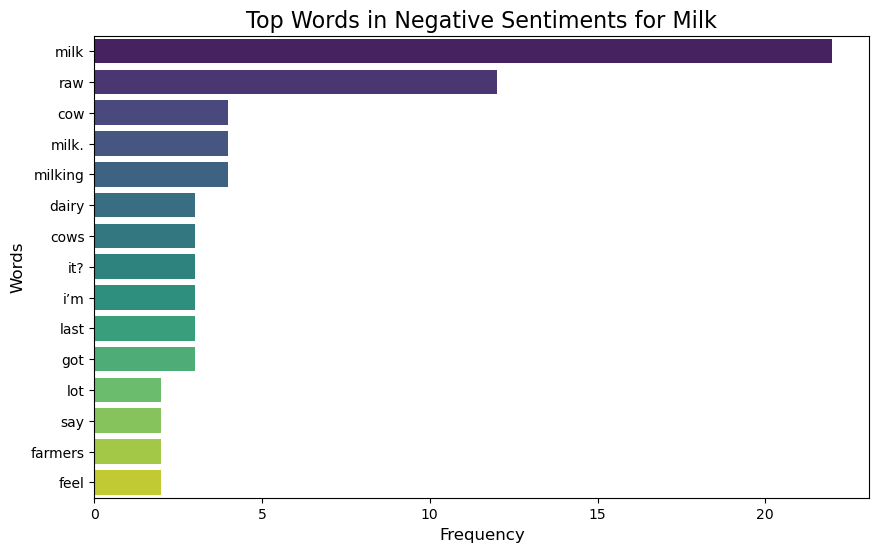

C:\Users\feder\AppData\Local\Temp\ipykernel_62772\2293789855.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=meat_word_df, x='Frequency', y='Word', palette='viridis')


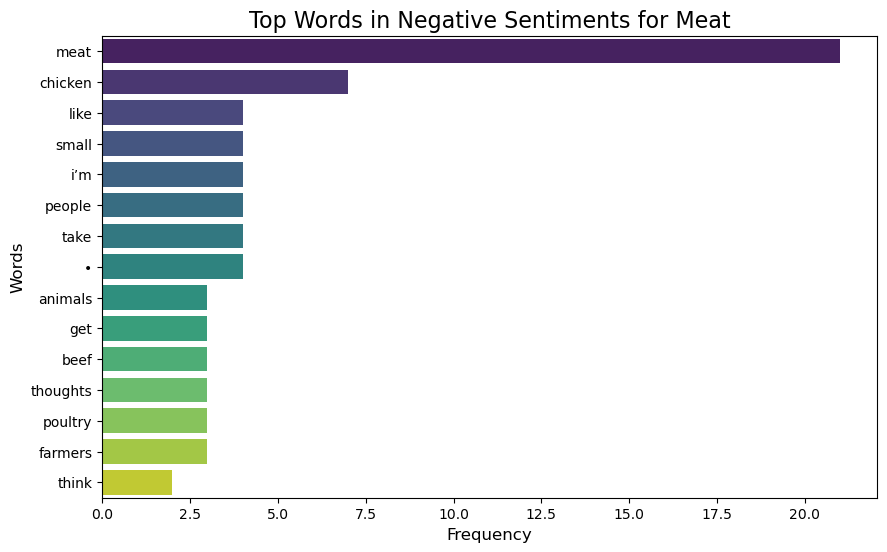

In [60]:
# Convert word counts to DataFrame for plotting
milk_word_df = pd.DataFrame(milk_word_counts, columns=['Word', 'Frequency'])
meat_word_df = pd.DataFrame(meat_word_counts, columns=['Word', 'Frequency'])

# Plot word frequencies for Milk
plt.figure(figsize=(10, 6))
sns.barplot(data=milk_word_df, x='Frequency', y='Word', palette='viridis')
plt.title('Top Words in Negative Sentiments for Milk', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.show()

# Plot word frequencies for Meat
plt.figure(figsize=(10, 6))
sns.barplot(data=meat_word_df, x='Frequency', y='Word', palette='viridis')
plt.title('Top Words in Negative Sentiments for Meat', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.show()

In [62]:
# Filter posts containing "raw milk" for Milk
raw_milk_posts = reddit_data[
    (reddit_data['query'] == 'Milk') &
    (reddit_data['sentiment_category'] == 'negative') &
    (reddit_data['content'].str.contains("raw milk", case=False, na=False))
][['title', 'content', 'subreddit', 'sentiment_score']]

# Filter posts containing "chicken" for Meat
chicken_posts = reddit_data[
    (reddit_data['query'] == 'Meat') &
    (reddit_data['sentiment_category'] == 'negative') &
    (reddit_data['content'].str.contains("chicken", case=False, na=False))
][['title', 'content', 'subreddit', 'sentiment_score']]

raw_milk_posts, chicken_posts


(                                                 title  \
 200  Bird flu detected in second lot of raw milk so...   
 210                          Raw milk has made me sick   
 224                                           Raw milk   
 278                                        Raw milk NJ   
 588  You can now go to prison in Canada for providi...   
 610                             Some swear by raw milk   
 612  State panel rejects stronger raw milk rules - ...   
 
                                                content    subreddit  \
 200  Bird flu detected in second lot of raw milk so...      farming   
 210  Raw milk has made me sick Last week I tried ra...      farming   
 224  Raw milk Would unopened raw milk last a month ...      farming   
 278  Raw milk NJ Who selling the raw milk in NJ let...      farming   
 588  You can now go to prison in Canada for providi...  agriculture   
 610                            Some swear by raw milk   agriculture   
 612  State panel reje

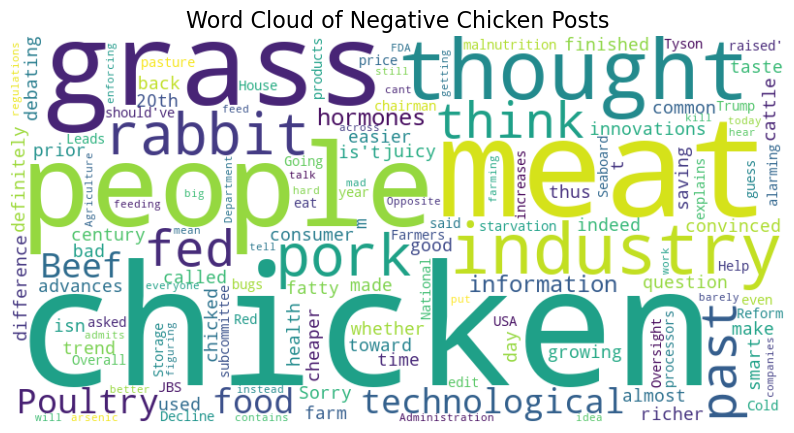

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine content for chicken posts with negative sentiment
chicken_text = " ".join(chicken_posts['content'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(chicken_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Chicken Posts', fontsize=16)
plt.show()


In [72]:
# Extract and display a list of negative titles for Milk and Meat
negative_titles_milk = reddit_data[
    (reddit_data['query'] == 'Milk') & (reddit_data['sentiment_category'] == 'negative')
]['title'].tolist()

negative_titles_meat = reddit_data[
    (reddit_data['query'] == 'Meat') & (reddit_data['sentiment_category'] == 'negative')
]['title'].tolist()

negative_titles_milk, negative_titles_meat


(['Bird flu detected in second lot of raw milk sold in California, health officials say',
  'Organic dairy farmers consider dumping milk due to poor prices',
  'How do cows feel about getting milked?',
  'Debunked: Baseless claims about a cow feed supplement used in attempts to boycott milk ',
  'Milk house drain plugged',
  'Raw milk has made me sick',
  'If you got a cow really drunk and than milked it would you get alcoholic Milk from it?',
  'Raw milk',
  'It gets worse its a bull that got in with the milking herd',
  'Study: Organic, Conventional Dairy Cows Show No Difference In Health, Milk Quality',
  'Dumped milk, smashed eggs and plowed vegetables: Coronavirus pandemic leaves staggering amount of food waste',
  'Small ones taking a break after milking time',
  'Whoever said, "There\'s no use crying over spilt milk." had never sent an entire milking down the drain.',
  'Chugging down milk',
  'Raw milk NJ',
  'Political push for raw, unpasteurized milk is increasing access, but